In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np

class ActivationFunctions:
        
    def ReLu(data,derivative=False):
        if derivative:
            data=np.array(data)
            temp=np.sign(np.maximum(0,data))
            return temp
        temp = np.array(data)
        return np.maximum(0,temp)
        
#     def Sign(data,derivative=False):
#         assert derivative==False
#         temp = np.array(data)
#         return np.sign(temp)
    
    def Sigmoid(data,derivative = False):
        if derivative:
            
#             data=1.0/(1.0+np.exp(-temp))
#             return data*(1.0-data)
        
            
        
            return (1-data)*data
        
        temp = np.array(data)
        return 1.0/(1.0+np.exp(-temp))
    
    
    
    def Default(data,derivative=False):
        return Sigmoid(data,derivative)
#         if derivative:
#             return 1
#         return np.array(data)
        
#     def SoftMax(data,derivative=False):
#         assert derivative
#         temp = np.exp(np.array(data))
#         return temp/np.sum(temp)
    
class LossFunctions:
    
#     def MSE(estimator,goal):
# #         assert isinstance(estimator,np.array)
# #         assert isinstance(goal,np.array)
# #         print(estimator.shape, goal.shape)
# #         assert estimator.shape == goal.shape
# #         assert estimator.shape[0] == 1 or estimator.shape[1] ==1
#         estimator = np.array(estimator)
#         goal = np.array(goal)
        
#         return np.sum([i*i for i in (estimator-goal)])/len(np.max([estimator.shape[0] ,estimator.shape[1]]))
    
    def AE(estimator,goal,derivative=False):
        
        if derivative:
            return estimator-goal
        return (estimator-goal)*(estimator-goal)/2
        
        

class Layer:
    
    def __init__(self,shape,function=ActivationFunctions.Default) -> None:
        assert len(shape)==2
        assert isinstance(shape[0],int) and isinstance(shape[1],int)
        assert shape[0]>0 and shape[1]>0
        self.function=function
        self.shape = shape

        self._init_matrix()
        self.output=None
        self.input=None

    def __init__(self,shape_x:int,shape_y:int,function=ActivationFunctions.Default) -> None:
        assert shape_y>0 and shape_x>0

        self.shape = (shape_x,shape_y)
        self.function=function
        self._init_matrix()
        self.output=None
        self.input=None

    def _init_matrix(self):
        self.matrix = (np.random.randn(self.shape[0],self.shape[1])*2)-1
#         self.matrix = np.array([ [1.0 for i in range(self.shape[1])] for y in range(self.shape[0])])
#         self.bias=np.random.randn(1,self.shape[1])


    def forward(self,data,function=ActivationFunctions.Default):
        
        if function in [None,ActivationFunctions.Default]:
            function = self.function
        if function == None:
            assert 1==0
            self.output=np.dot(data,self.matrix)#-self.bias
            self.input=data
            return self.output
        else:
            #-self.bias
            self.input=data.copy()
            self.dot = np.dot(data,self.matrix)
            self.output = function(self.dot)
            return self.output.copy()
    

In [28]:
performance = []
class Model:

    def __init__(self):
        self.layers=[]
        self.structure=[]
        self.learningFactor=5 # TODO implementation
        self.dataset={}
        self.loss_v=None
    def addLayer(self,numberOfNeurons:int,function=ActivationFunctions.Default):
        assert numberOfNeurons>0
        # TODO to validate function
        self.layers.append((numberOfNeurons,function))
        
    def compileModel(self):
        assert len(self.layers)>=2
        self.structure=[]
        for i in range(len(self.layers)-1):
            self.structure.append(Layer(self.layers[i][0],self.layers[i+1][0],self.layers[i+1][1]))
            
    def forward(self,data):
        assert len(self.structure)>=2
        output = data
        for i in self.structure:
            output = i.forward(output).copy()
        return output.copy()
    
    def upload_test_dataset(self,data): #TODO add validation
        self.dataset['test'] = data
        
    def upload_train_dataset(self,data): #TODO add validation
        self.dataset['train'] = data
    
    def loss(self,goal,function=LossFunctions.AE):
        return function(self.structure[-1].output,goal)
    
    def evaluate(self):
        suma = 0.0
        for x,y in zip(self.dataset['train']['egzo'],self.dataset['train']['endo']):
            temp = (self.forward(x)-y)
            temp *= temp
            suma +=temp
        return suma
        
    def SGD(self,x,y):
        out = x
        for i in range(len(self.structure)):
            out = self.structure[i].forward(out)
        self.loss_v=self.loss(y,LossFunctions.AE)
#         print("LOSS_V: ",self.loss_v)

        nabla_w = [0]*len(self.structure)

        #dla ostatniej warstwy
        print("self.structure[-1].output",self.structure[-1].output)
        print("y",y)
        print("LossFunctions.AE(self.structure[-1].output,y,derivative=True)",LossFunctions.AE(self.structure[-1].output,y,derivative=True))
        print("self.structure[-1].function(self.structure[-1].output,derivative=True)",self.structure[-1].function(self.structure[-1].output,derivative=True))
        delta = LossFunctions.AE(self.structure[-1].output,y,derivative=True) * self.structure[-1].function(self.structure[-1].output,derivative=True)
        print("delta",delta)
        self.structure[-1].input = np.expand_dims(self.structure[-1].input, axis=1)
        print("self.structure[-1].input",self.structure[-1].input)
        delta = np.expand_dims(delta, axis=1)

        nabla_w[-1]= np.dot( self.structure[-1].input,delta.T)
        print(nabla_w[-1])
        for l_temp in range(2,len(self.structure)+1):
            l=l_temp
            z=None
            #z = self.structure[-l].dot
#             print("z",z)
            sp=self.structure[-l].function(self.structure[-l].output,derivative=True)
#             print("sp",sp)
#             print("delta",delta)
            delta = np.dot(delta,self.structure[-l+1].matrix.T)*sp
#             print("delta",delta)
            self.structure[-l].input = np.expand_dims(self.structure[-l].input, axis=1)
#             print("self.structure[-l].input",self.structure[-l].input)
#             print(f"!!!!!delta{l} ",delta)
#             print(f"self.structure[{-l}].input.T",self.structure[-l].input)
            
            nabla_w[-l] = np.dot(self.structure[-l].input,delta)
#             print(f"nabla_w[{-l}]",nabla_w[-l])
#             print(f"nabla_w[{-l}]",nabla_w[-l])


        return nabla_w

    def train(self):
        global performance
        self.learningFactor=0.3
        counter=1000
        while counter>=0:
            counter-=1
#             if self.evaluate() <3.99:
#                 print("DONEE!!!!")
#                 break
            arr = None
            for x,y in zip(self.dataset['train']['egzo'],self.dataset['train']['endo']):
                temp=self.SGD(x,y)
#                 return temp

                for i  in range(len(self.structure)):
#                     dodanie[i] = self.structure[i].matrix + arr[i]
                    self.structure[i].matrix = self.structure[i].matrix - np.multiply(self.learningFactor,temp[i])
            performance.append(self.evaluate())
            
                    
                    

    
def perturb(model):
    ee=1e-4
    arr = [[[0 for iii in range(len(model.structure[i].matrix[ii]))] for ii in range(len(model.structure[i].matrix))] for i in range(len(model.structure))]
    for i in range(len(model.structure)):
        for ii in range(len(model.structure[i].matrix)):
            for iii in range(len(model.structure[i].matrix[ii])):
                model.structure[i].matrix[ii][iii]+=ee
                out = model.forward([[1,1,0,0]])
#                 print('out',out)
                model.structure[i].matrix[ii][iii]-=ee
                outout=model.forward([[1,1,0,0]])
#                 print('outout',outout)
                arr[i][ii][iii] = np.sum((out - outout) )/ee
              
    return arr

In [29]:
performance = []
model = Model()
# model.addLayer(4,ActivationFunctions.Sigmoid)
# model.addLayer(4,ActivationFunctions.Sigmoid)
# model.addLayer(4,ActivationFunctions.Sigmoid)
# model.addLayer(1,ActivationFunctions.Sigmoid)


model.addLayer(4,ActivationFunctions.Sigmoid)
model.addLayer(4,ActivationFunctions.Sigmoid)
model.addLayer(4,ActivationFunctions.Sigmoid)
model.addLayer(1,ActivationFunctions.Sigmoid)


model.compileModel()
# train_dataset= {
#     'egzo': np.array([[1,1,0,0],[1,0,0,0],[0,1,0,0],[0,0,0,0],[1,1,1,0],[1,0,1,0],[0,1,1,0],[0,0,1,0],[1,1,0,1],[1,0,0,1],[0,1,0,1],[0,0,0,1],[1,1,1,1],[1,0,1,1],[0,1,1,1],[0,0,1,1]]),
#     'endo':np.array([ [1,0],      [0,1],      [0,1],      [1,0],      [0,1],      [1,0],      [1,0],      [0,1],      [0,1],      [1,0],      [1,0],      [0,0],      [1,0],      [0,1],      [0,1],      [1,0]])
# }

train_dataset= {
    'egzo': np.array([[1,1,0,0],[1,0,0,0],]), #[0,1,0,0],[0,0,0,0],[1,1,1,0],[1,0,1,0],[0,1,1,0],[0,0,1,0],[1,1,0,1],[1,0,0,1],[0,1,0,1],[0,0,0,1],[1,1,1,1],[1,0,1,1],[0,1,1,1],[0,0,1,1]]
    'endo':np.array([ [1],      [0],])#      [0],      [1],      [0],      [1],      [1],      [0],      [0],      [1],      [1],      [0],      [1],      [0],      [0],      [1]])*0.5+0.25
}

# train_dataset= {
#     'egzo': np.array([[0.3]]),
#     'endo':np.array([ [1,0],      [0,1],      [0,1],      [1,0],      [0,1],      [1,0],      [1,0],      [0,1],      [0,1],      [1,0],      [1,0],      [0,0],      [1,0],      [0,1],      [0,1],      [1,0]])
# }

#print(train_dataset)
model.upload_train_dataset(train_dataset)
# for i in range(len(model.structure)):
#     print(model.structure[i].shape,end=f" {model.structure[i].function}\n ")
#model.forward(np.array([1,2,3,4,5]))
one=model.train()
one

self.structure[-1].output [0.09253407]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.90746593]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.08397152]
delta [-0.07620129]
self.structure[-1].input [[0.07092847]
 [0.36620484]
 [0.90997552]
 [0.06844435]]
[[-0.00540484]
 [-0.02790528]
 [-0.06934131]
 [-0.00521555]]
self.structure[-1].output [0.11457421]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.11457421]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.10144696]
delta [0.0116232]
self.structure[-1].input [[0.10689848]
 [0.47493469]
 [0.86834763]
 [0.11772259]]
[[0.0012425 ]
 [0.00552026]
 [0.01009298]
 [0.00136831]]
self.structure[-1].output [0.09498852]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.90501148]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.0859657]
delta [-0.07779995]
self.structure[-1].input [[0.07146682]
 [0.3688

self.structure[-1].output [0.17356468]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.82643532]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.14343998]
delta [-0.11854387]
self.structure[-1].input [[0.08623557]
 [0.44058167]
 [0.89242968]
 [0.05865673]]
[[-0.0102227 ]
 [-0.05222826]
 [-0.10579207]
 [-0.0069534 ]]
self.structure[-1].output [0.2146912]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.2146912]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.16859889]
delta [0.0361967]
self.structure[-1].input [[0.12458836]
 [0.53816081]
 [0.84907131]
 [0.10482084]]
[[0.00450969]
 [0.01947964]
 [0.03073358]
 [0.00379417]]
self.structure[-1].output [0.17938458]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.82061542]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.14720575]
delta [-0.12079931]
self.structure[-1].input [[0.08720131]
 [0.44512

self.structure[-1].output [0.38812918]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.38812918]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.23748492]
delta [0.09217483]
self.structure[-1].input [[0.14958352]
 [0.62074782]
 [0.82736167]
 [0.09693087]]
[[0.01378784]
 [0.05721732]
 [0.07626192]
 [0.00893459]]
self.structure[-1].output [0.33795544]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.66204456]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.22374156]
delta [-0.14812688]
self.structure[-1].input [[0.11076791]
 [0.55169614]
 [0.87009329]
 [0.05292818]]
[[-0.01640771]
 [-0.08172103]
 [-0.12888421]
 [-0.00784009]]
self.structure[-1].output [0.39516049]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.39516049]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.23900868]
delta [0.09444679]
self.structure[-1].input [[0.15055819]
 [0.6239

self.structure[-1].output [0.43440195]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.56559805]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.2456969]
delta [-0.13896569]
self.structure[-1].input [[0.12422038]
 [0.61760365]
 [0.85993506]
 [0.05425305]]
[[-0.01726237]
 [-0.08582572]
 [-0.11950147]
 [-0.00753931]]
self.structure[-1].output [0.48294366]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.48294366]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24970908]
delta [0.12059542]
self.structure[-1].input [[0.16275702]
 [0.67045694]
 [0.81783919]
 [0.09859484]]
[[0.01962775]
 [0.08085404]
 [0.09862766]
 [0.01189009]]
self.structure[-1].output [0.43752756]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.56247244]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24609719]
delta [-0.13842289]
self.structure[-1].input [[0.12465776]
 [0.620

self.structure[-1].output [0.47023951]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.52976049]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24911431]
delta [-0.13197092]
self.structure[-1].input [[0.12931506]
 [0.65449402]
 [0.85609142]
 [0.0582204 ]]
[[-0.01706583]
 [-0.08637418]
 [-0.11297917]
 [-0.0076834 ]]
self.structure[-1].output [0.50836664]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.50836664]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24993]
delta [0.12705607]
self.structure[-1].input [[0.16634301]
 [0.6958695 ]
 [0.81519487]
 [0.10431856]]
[[0.02113489]
 [0.08841445]
 [0.10357546]
 [0.01325431]]
self.structure[-1].output [0.47149189]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.52850811]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24918729]
delta [-0.1316975]
self.structure[-1].input [[0.12950262]
 [0.656292

delta [0.12782694]
self.structure[-1].input [[0.16802523]
 [0.729517  ]
 [0.81367394]
 [0.12092563]]
[[0.02147815]
 [0.09325193]
 [0.10400945]
 [0.01545755]]
self.structure[-1].output [0.49147602]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.50852398]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24992734]
delta [-0.12709405]
self.structure[-1].input [[0.13357626]
 [0.70324059]
 [0.85250451]
 [0.06954824]]
[[-0.01697675]
 [-0.08937769]
 [-0.10834825]
 [-0.00883917]]
self.structure[-1].output [0.51136103]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.51136103]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24987093]
delta [0.12777425]
self.structure[-1].input [[0.16807168]
 [0.7304354 ]
 [0.81363828]
 [0.12154316]]
[[0.02147523]
 [0.09333084]
 [0.10396202]
 [0.01553009]]
self.structure[-1].output [0.49179164]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.5

self.structure[-1].output [0.49515183]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.50484817]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.2499765]
delta [-0.12620018]
self.structure[-1].input [[0.13526933]
 [0.71880094]
 [0.85119431]
 [0.07491088]]
[[-0.01707101]
 [-0.09071281]
 [-0.10742087]
 [-0.00945377]]
self.structure[-1].output [0.50782137]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.50782137]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24993883]
delta [0.12692428]
self.structure[-1].input [[0.16883868]
 [0.74192683]
 [0.81312937]
 [0.13009961]]
[[0.02142973]
 [0.09416853]
 [0.10320586]
 [0.0165128 ]]
self.structure[-1].output [0.49540883]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.50459117]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24997892]
delta [-0.12613716]
self.structure[-1].input [[0.13541521]
 [0.719

LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.50084026]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24999929]
delta [-0.12520971]
self.structure[-1].input [[0.13795692]
 [0.73623926]
 [0.84932972]
 [0.08212426]]
[[-0.01727355]
 [-0.0921843 ]
 [-0.10634433]
 [-0.01028275]]
self.structure[-1].output [0.50233139]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.50233139]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24999456]
delta [0.12558012]
self.structure[-1].input [[0.17032933]
 [0.75508945]
 [0.81232537]
 [0.14203773]]
[[0.02138998]
 [0.09482422]
 [0.10201192]
 [0.01783712]]
self.structure[-1].output [0.49941195]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.50058805]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24999965]
delta [-0.12514684]
self.structure[-1].input [[0.13815286]
 [0.73727449]
 [0.84920133]
 [0.08259719]]
[[-0.017

self.structure[-1].output [0.50284857]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.49715143]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24999189]
delta [-0.12428382]
self.structure[-1].input [[0.1410565 ]
 [0.75020558]
 [0.84738449]
 [0.08897901]]
[[-0.01753104]
 [-0.09323842]
 [-0.10531618]
 [-0.01105865]]
self.structure[-1].output [0.49677633]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.49677633]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24998961]
delta [0.12418892]
self.structure[-1].input [[0.17223855]
 [0.76582995]
 [0.81142265]
 [0.15387751]]
[[0.02139012]
 [0.09510759]
 [0.1007697 ]
 [0.01910988]]
self.structure[-1].output [0.50312937]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.49687063]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24999021]
delta [-0.12421279]
self.structure[-1].input [[0.14130955]
 [0.75

delta [-0.12328789]
self.structure[-1].input [[0.14472398]
 [0.76223029]
 [0.84526339]
 [0.09578734]]
[[-0.01784272]
 [-0.09397377]
 [-0.10421074]
 [-0.01180942]]
self.structure[-1].output [0.49096787]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.49096787]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24991842]
delta [0.12270192]
self.structure[-1].input [[0.17458349]
 [0.77519428]
 [0.81041036]
 [0.16616913]]
[[0.02142173]
 [0.09511782]
 [0.0994389 ]
 [0.02038927]]
self.structure[-1].output [0.50708562]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.49291438]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24994979]
delta [-0.12320385]
self.structure[-1].input [[0.14504235]
 [0.76312027]
 [0.84508644]
 [0.09632823]]
[[-0.01786978]
 [-0.09401935]
 [-0.1041179 ]
 [-0.01186801]]
self.structure[-1].output [0.49049191]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) 

self.structure[-1].output [0.48107932]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.48107932]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24964201]
delta [0.12009761]
self.structure[-1].input [[0.17912091]
 [0.78785012]
 [0.80864165]
 [0.18666691]]
[[0.02151199]
 [0.09461891]
 [0.09711593]
 [0.02241825]]
self.structure[-1].output [0.51426199]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.48573801]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.2497966]
delta [-0.1213357]
self.structure[-1].input [[0.15225934]
 [0.77914547]
 [0.84131121]
 [0.10704046]]
[[-0.01847449]
 [-0.09453816]
 [-0.10208108]
 [-0.01298783]]
self.structure[-1].output [0.48050406]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.48050406]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24961991]
delta [0.11994338]
self.structure[-1].input [[0.17939929]
 [0.788482

self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24903936]
delta [0.11680091]
self.structure[-1].input [[0.18515521]
 [0.79927104]
 [0.80657157]
 [0.21056417]]
[[0.0216263 ]
 [0.09335559]
 [0.0942083 ]
 [0.02459409]]
self.structure[-1].output [0.5238673]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.4761327]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24943035]
delta [-0.11876195]
self.structure[-1].input [[0.16221978]
 [0.79360002]
 [0.83666354]
 [0.11845661]]
[[-0.01926554]
 [-0.09424948]
 [-0.09936379]
 [-0.01406814]]
self.structure[-1].output [0.46829691]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.46829691]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24899491]
delta [0.11660355]
self.structure[-1].input [[0.18551855]
 [0.79983711]
 [0.80645557]
 [0.21192393]]
[[0.02163212]
 [0.09326385]
 [0.09403558]
 [0.02471108]]
self.structure[-1].output [0.5

self.structure[-1].input [[0.17188305]
 [0.80330987]
 [0.83260824]
 [0.12715403]]
[[-0.01997446]
 [-0.09335232]
 [-0.09675707]
 [-0.01477652]]
self.structure[-1].output [0.45746975]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.45746975]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24819118]
delta [0.11353996]
self.structure[-1].input [[0.1911297 ]
 [0.80738207]
 [0.80477317]
 [0.23208988]]
[[0.02170086]
 [0.09167012]
 [0.09137391]
 [0.02635147]]
self.structure[-1].output [0.53385976]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.46614024]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24885352]
delta [-0.11600064]
self.structure[-1].input [[0.17266375]
 [0.80397367]
 [0.83229671]
 [0.12777962]]
[[-0.02002911]
 [-0.09326146]
 [-0.09654695]
 [-0.01482252]]
self.structure[-1].output [0.45662737]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.45662737]
self.st

self.structure[-1].output [0.44274917]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.44274917]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24672234]
delta [0.10923611]
self.structure[-1].input [[0.19883666]
 [0.81510635]
 [0.80275663]
 [0.25778817]]
[[0.02172014]
 [0.08903905]
 [0.08769001]
 [0.02815978]]
self.structure[-1].output [0.54761757]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.45238243]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24773257]
delta [-0.11206986]
self.structure[-1].input [[0.18709263]
 [0.81405939]
 [0.82689809]
 [0.13776398]]
[[-0.02096745]
 [-0.09123152]
 [-0.09267036]
 [-0.01543919]]
self.structure[-1].output [0.44173597]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.44173597]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.2466053]
delta [0.10893443]
self.structure[-1].input [[0.19936747]
 [0.81555

LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.42265028]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24401702]
delta [0.10313386]
self.structure[-1].input [[0.20932618]
 [0.82259036]
 [0.80045904]
 [0.29005865]]
[[0.02158862]
 [0.08483692]
 [0.08255443]
 [0.02991487]]
self.structure[-1].output [0.56786289]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.43213711]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24539463]
delta [-0.10604413]
self.structure[-1].input [[0.20853113]
 [0.82419761]
 [0.81987534]
 [0.14863518]]
[[-0.0221135 ]
 [-0.08740131]
 [-0.08694296]
 [-0.01576189]]
self.structure[-1].output [0.42141288]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.42141288]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24382406]
delta [0.1027506]
self.structure[-1].input [[0.20996787]
 [0.82296753]
 [0.80033279]
 [0.29195057]]
[[0.0215743

self.structure[-1].output [0.39978516]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.39978516]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.23995699]
delta [0.09593124]
self.structure[-1].input [[0.22106545]
 [0.82843956]
 [0.79836841]
 [0.32347083]]
[[0.02120708]
 [0.07947324]
 [0.07658847]
 [0.03103096]]
self.structure[-1].output [0.59231747]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.40768253]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.24147748]
delta [-0.09844615]
self.structure[-1].input [[0.23501933]
 [0.83257479]
 [0.81236052]
 [0.15810331]]
[[-0.02313675]
 [-0.08196378]
 [-0.07997377]
 [-0.01556466]]
self.structure[-1].output [0.39831815]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.39831815]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.2396608]
delta [0.09546125]
self.structure[-1].input [[0.22180876]
 [0.82874

self.structure[-1].output [0.36799769]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.36799769]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.23257539]
delta [0.08558721]
self.structure[-1].input [[0.23683122]
 [0.83380124]
 [0.79615788]
 [0.36534525]]
[[0.02026972]
 [0.07136272]
 [0.06814093]
 [0.03126888]]
self.structure[-1].output [0.62757543]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.37242457]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.23372451]
delta [-0.08704475]
self.structure[-1].input [[0.27481677]
 [0.84090625]
 [0.80264728]
 [0.16773549]]
[[-0.02392136]
 [-0.07319647]
 [-0.06986623]
 [-0.01460049]]
self.structure[-1].output [0.36628375]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.36628375]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.23211996]
delta [0.08502177]
self.structure[-1].input [[0.23765888]
 [0.8340

self.structure[-1].output [0.33215324]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.33215324]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.22182746]
delta [0.07368071]
self.structure[-1].input [[0.25359182]
 [0.83763315]
 [0.79434885]
 [0.40790911]]
[[0.01868483]
 [0.0617174 ]
 [0.05852819]
 [0.03005503]]
self.structure[-1].output [0.66756236]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.33243764]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.22192285]
delta [-0.07377551]
self.structure[-1].input [[0.32272351]
 [0.84760828]
 [0.79246135]
 [0.17540157]]
[[-0.02380909]
 [-0.06253273]
 [-0.05846424]
 [-0.01294034]]
self.structure[-1].output [0.33030182]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.33030182]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.22120253]
delta [0.0730636]
self.structure[-1].input [[0.25442486]
 [0.83778

self.structure[-1].function(self.structure[-1].output,derivative=True) [0.20656306]
delta [0.06023062]
self.structure[-1].input [[0.27107366]
 [0.8403984 ]
 [0.7928615 ]
 [0.45223312]]
[[0.01632694]
 [0.05061772]
 [0.04775454]
 [0.02723828]]
self.structure[-1].output [0.71180921]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.28819079]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.20513686]
delta [-0.05911855]
self.structure[-1].input [[0.37961141]
 [0.85327509]
 [0.78142347]
 [0.18147874]]
[[-0.02244208]
 [-0.05044439]
 [-0.04619663]
 [-0.01072876]]
self.structure[-1].output [0.28978716]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.28978716]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.20581056]
delta [0.05964126]
self.structure[-1].input [[0.2718104 ]
 [0.84049513]
 [0.79280501]
 [0.4541333 ]]
[[0.01621111]
 [0.05012819]
 [0.04728389]
 [0.02708508]]
self.structure[-1].output [0

y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.25109288]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.18804524]
delta [0.04721682]
self.structure[-1].input [[0.28687385]
 [0.84220758]
 [0.7917052 ]
 [0.49427309]]
[[0.01354527]
 [0.03976636]
 [0.0373818 ]
 [0.023338  ]]
self.structure[-1].output [0.75437013]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.24562987]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.18529584]
delta [-0.04551419]
self.structure[-1].input [[0.43854098]
 [0.85783398]
 [0.77025926]
 [0.18555513]]
[[-0.01995984]
 [-0.03904362]
 [-0.03505773]
 [-0.00844539]]
self.structure[-1].output [0.24954842]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.24954842]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.18727401]
delta [0.04673393]
self.structure[-1].input [[0.28744288]
 [0.84226357]
 [0.79166442]
 [0.49585505]]
[[0.

self.structure[-1].output [0.21513413]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.21513413]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.16885143]
delta [0.03632571]
self.structure[-1].input [[0.29943212]
 [0.84332482]
 [0.79076315]
 [0.53103831]]
[[0.01087708]
 [0.03063437]
 [0.02872503]
 [0.01929034]]
self.structure[-1].output [0.7908462]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.2091538]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.16540849]
delta [-0.03459581]
self.structure[-1].input [[0.49254657]
 [0.86143324]
 [0.75951833]
 [0.18762724]]
[[-0.01704005]
 [-0.02980198]
 [-0.02627615]
 [-0.00649112]]
self.structure[-1].output [0.21392297]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.21392297]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.16815994]
delta [0.03597327]
self.structure[-1].input [[0.29982848]
 [0.843356

self.structure[-1].function(self.structure[-1].output,derivative=True) [0.14526318]
delta [-0.02561997]
self.structure[-1].input [[0.54390027]
 [0.86464625]
 [0.74811677]
 [0.18801024]]
[[-0.01393471]
 [-0.02215221]
 [-0.01916673]
 [-0.00481682]]
self.structure[-1].output [0.1810456]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.1810456]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.14826809]
delta [0.02684329]
self.structure[-1].input [[0.30980555]
 [0.84408934]
 [0.78977023]
 [0.56633709]]
[[0.0083162 ]
 [0.02265813]
 [0.02120003]
 [0.01520235]]
self.structure[-1].output [0.82448231]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.17551769]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.14471123]
delta [-0.02539938]
self.structure[-1].input [[0.54526915]
 [0.86473116]
 [0.74778889]
 [0.18799633]]
[[-0.0138495 ]
 [-0.02196364]
 [-0.01899337]
 [-0.00477499]]
self.structure[-1].output

self.structure[-1].output [0.16895504]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.16895504]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.14040923]
delta [0.02372285]
self.structure[-1].input [[0.31303207]
 [0.84430326]
 [0.78935434]
 [0.57912812]]
[[0.00742601]
 [0.02002928]
 [0.01872573]
 [0.01373857]]
self.structure[-1].output [0.83624044]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.16375956]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.13694237]
delta [-0.02242562]
self.structure[-1].input [[0.56434373]
 [0.86591744]
 [0.74305266]
 [0.18765592]]
[[-0.01265576]
 [-0.01941874]
 [-0.01666342]
 [-0.0042083 ]]
self.structure[-1].output [0.16821104]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.16821104]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.13991608]
delta [0.02353543]
self.structure[-1].input [[0.31322142]
 [0.8443

delta [-0.01885764]
self.structure[-1].input [[0.58899019]
 [0.86747066]
 [0.73638688]
 [0.18677399]]
[[-0.01110696]
 [-0.01635845]
 [-0.01388652]
 [-0.00352212]]
self.structure[-1].output [0.15291915]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.15291915]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.12953488]
delta [0.01980836]
self.structure[-1].input [[0.31684546]
 [0.84454322]
 [0.78871594]
 [0.5964268 ]]
[[0.00627619]
 [0.01672902]
 [0.01562317]
 [0.01181424]]
self.structure[-1].output [0.85172988]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.14827012]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.12628609]
delta [-0.01872445]
self.structure[-1].input [[0.58995326]
 [0.8675321 ]
 [0.73611177]
 [0.18672846]]
[[-0.01104655]
 [-0.01624407]
 [-0.01378329]
 [-0.00349639]]
self.structure[-1].output [0.15232552]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) 

y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.13953644]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.12006602]
delta [0.01675358]
self.structure[-1].input [[0.31953315]
 [0.84470432]
 [0.78807837]
 [0.61123322]]
[[0.00535333]
 [0.01415183]
 [0.01320314]
 [0.01024035]]
self.structure[-1].output [0.86458513]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.13541487]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.11707768]
delta [-0.01585406]
self.structure[-1].input [[0.6115991 ]
 [0.86893406]
 [0.72958345]
 [0.18546236]]
[[-0.00969633]
 [-0.01377613]
 [-0.01156686]
 [-0.00294033]]
self.structure[-1].output [0.13905818]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.13905818]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.11972101]
delta [0.01664819]
self.structure[-1].input [[0.31961953]
 [0.84470939]
 [0.78805338]
 [0.61176966]]
[[0.

self.structure[-1].output [0.13107819]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.13107819]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.1138967]
delta [0.01492937]
self.structure[-1].input [[0.32095003]
 [0.84478652]
 [0.78761005]
 [0.62080391]]
[[0.00479158]
 [0.01261213]
 [0.01175852]
 [0.00926821]]
self.structure[-1].output [0.87268568]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.12731432]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.11110539]
delta [-0.01414531]
self.structure[-1].input [[0.62540894]
 [0.86985463]
 [0.72502267]
 [0.18439066]]
[[-0.0088466 ]
 [-0.01230436]
 [-0.01025567]
 [-0.00260826]]
self.structure[-1].output [0.13066717]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.13066717]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.11359326]
delta [0.01484291]
self.structure[-1].input [[0.32101261]
 [0.84479

self.structure[-1].function(self.structure[-1].output,derivative=True) [0.10482379]
delta [-0.01247194]
self.structure[-1].input [[0.63974578]
 [0.87083805]
 [0.71989422]
 [0.18303389]]
[[-0.00797887]
 [-0.01086104]
 [-0.00897848]
 [-0.00228279]]
self.structure[-1].output [0.1220149]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.1220149]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.10712726]
delta [0.01307112]
self.structure[-1].input [[0.32218074]
 [0.8448561 ]
 [0.7870372 ]
 [0.63127456]]
[[0.00421126]
 [0.01104322]
 [0.01028746]
 [0.00825147]]
self.structure[-1].output [0.88135138]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.11864862]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.10457112]
delta [-0.01240722]
self.structure[-1].input [[0.64031849]
 [0.87087801]
 [0.71968005]
 [0.18297416]]
[[-0.00794457]
 [-0.01080517]
 [-0.00892923]
 [-0.0022702 ]]
self.structure[-1].output

self.structure[-1].function(self.structure[-1].output,derivative=True) [0.09916551]
delta [-0.01106943]
self.structure[-1].input [[0.65249912]
 [0.87174136]
 [0.71493654]
 [0.18159617]]
[[-0.00722279]
 [-0.00964968]
 [-0.00791394]
 [-0.00201017]]
self.structure[-1].output [0.1143682]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.1143682]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.10128811]
delta [0.01158414]
self.structure[-1].input [[0.32295074]
 [0.84489834]
 [0.78648438]
 [0.64030717]]
[[0.00374111]
 [0.00978742]
 [0.00911074]
 [0.00741741]]
self.structure[-1].output [0.8886556]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.1113444]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.09894683]
delta [-0.01101718]
self.structure[-1].input [[0.652989  ]
 [0.87177666]
 [0.71473781]
 [0.18153631]]
[[-0.00719409]
 [-0.00960452]
 [-0.00787439]
 [-0.00200002]]
self.structure[-1].output [

self.structure[-1].input [[0.32334535]
 [0.84491908]
 [0.78601647]
 [0.64726531]]
[[0.00339897]
 [0.00888169]
 [0.00826251]
 [0.00680398]]
self.structure[-1].output [0.8941702]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.1058298]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.09462985]
delta [-0.01001466]
self.structure[-1].input [[0.662615  ]
 [0.87248013]
 [0.7106963 ]
 [0.18028631]]
[[-0.00663586]
 [-0.00873759]
 [-0.00711738]
 [-0.00180551]]
self.structure[-1].output [0.10833641]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.10833641]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.09659963]
delta [0.01046526]
self.structure[-1].input [[0.32335882]
 [0.84491976]
 [0.78599455]
 [0.64757756]]
[[0.00338403]
 [0.0088423 ]
 [0.00822563]
 [0.00677707]]
self.structure[-1].output [0.89441533]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.10558467]
self.structu

self.structure[-1].output [0.10283138]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.10283138]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.09225709]
delta [0.00948692]
self.structure[-1].input [[0.32355775]
 [0.8449291 ]
 [0.78549908]
 [0.65433796]]
[[0.00306957]
 [0.00801578]
 [0.00745197]
 [0.00620765]]
self.structure[-1].output [0.89967234]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.10032766]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.09026202]
delta [-0.00905578]
self.structure[-1].input [[0.67226904]
 [0.87320608]
 [0.70635882]
 [0.17888441]]
[[-0.00608792]
 [-0.00790756]
 [-0.00639663]
 [-0.00161994]]
self.structure[-1].output [0.10260814]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.10260814]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.09207971]
delta [0.00944813]
self.structure[-1].input [[0.32356205]
 [0.8449

self.structure[-1].output [0.09740559]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.09740559]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.08791774]
delta [0.00856368]
self.structure[-1].input [[0.32357234]
 [0.84492767]
 [0.78495856]
 [0.66113022]]
[[0.00277097]
 [0.00723569]
 [0.00672213]
 [0.00566171]]
self.structure[-1].output [0.90485542]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.09514458]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.08609209]
delta [-0.0081912]
self.structure[-1].input [[0.68140817]
 [0.87391433]
 [0.70195632]
 [0.17741008]]
[[-0.00558155]
 [-0.0071584 ]
 [-0.00574986]
 [-0.0014532 ]]
self.structure[-1].output [0.09721153]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.09721153]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.08776145]
delta [0.00853142]
self.structure[-1].input [[0.32356927]
 [0.84492

LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.09177721]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.08335415]
delta [-0.00765001]
self.structure[-1].input [[0.6873691 ]
 [0.87438836]
 [0.69891161]
 [0.17636617]]
[[-0.00525838]
 [-0.00668908]
 [-0.00534668]
 [-0.0013492 ]]
self.structure[-1].output [0.09370587]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.09370587]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.08492508]
delta [0.00795798]
self.structure[-1].input [[0.32346803]
 [0.84491998]
 [0.78455625]
 [0.66584223]]
[[0.00257415]
 [0.00672386]
 [0.00624348]
 [0.00529876]]
self.structure[-1].output [0.90839135]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.09160865]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.0832165]
delta [-0.00762335]
self.structure[-1].input [[0.68766798]
 [0.87441239]
 [0.69875509]
 [0.17631205]]
[[-0.0052

self.structure[-1].output [0.08987563]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.08987563]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.081798]
delta [0.00735165]
self.structure[-1].input [[0.32325301]
 [0.84490568]
 [0.78410741]
 [0.67079528]]
[[0.00237644]
 [0.00621145]
 [0.00576448]
 [0.00493145]]
self.structure[-1].output [0.91205406]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.08794594]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.08021145]
delta [-0.00705427]
self.structure[-1].input [[0.69417398]
 [0.87494214]
 [0.69525127]
 [0.17509036]]
[[-0.00489689]
 [-0.00617208]
 [-0.00490449]
 [-0.00123513]]
self.structure[-1].output [0.0897183]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.0897183]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.08166893]
delta [0.0073272]
self.structure[-1].input [[0.32324172]
 [0.84490495]

self.structure[-1].output [0.91521393]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.08478607]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07759739]
delta [-0.00657918]
self.structure[-1].input [[0.69980505]
 [0.87541129]
 [0.69206031]
 [0.17396343]]
[[-0.00460414]
 [-0.00575949]
 [-0.00455319]
 [-0.00114454]]
self.structure[-1].output [0.08643077]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.08643077]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07896049]
delta [0.00682462]
self.structure[-1].input [[0.32295883]
 [0.84488681]
 [0.78367261]
 [0.67531995]]
[[0.00220407]
 [0.00576603]
 [0.00534826]
 [0.0046088 ]]
self.structure[-1].output [0.91535042]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.08464958]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07748403]
delta [-0.00655899]
self.structure[-1].input [[0.70004867]
 [0.87

y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.08228941]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07551786]
delta [-0.00621432]
self.structure[-1].input [[0.70426664]
 [0.87579046]
 [0.68941925]
 [0.17302267]]
[[-0.00437654]
 [-0.00544244]
 [-0.00428427]
 [-0.00107522]]
self.structure[-1].output [0.08383428]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.08383428]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07680609]
delta [0.00643898]
self.structure[-1].input [[0.32266914]
 [0.84486849]
 [0.78332352]
 [0.67877723]]
[[0.00207766]
 [0.00544009]
 [0.00504381]
 [0.00437064]]
self.structure[-1].output [0.91783658]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.08216342]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07541259]
delta [-0.00619616]
self.structure[-1].input [[0.70449208]
 [0.8758098 ]
 [0.68928302]
 [0.17297398]]
[[

self.structure[-1].input [[0.70923484]
 [0.87622086]
 [0.68635215]
 [0.17192325]]
[[-0.00412784]
 [-0.00509972]
 [-0.00399466]
 [-0.00100062]]
self.structure[-1].output [0.08095204]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.08095204]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07439881]
delta [0.00602274]
self.structure[-1].input [[0.32227429]
 [0.84484368]
 [0.78291256]
 [0.68266534]]
[[0.00194097]
 [0.00508827]
 [0.00471527]
 [0.00411151]]
self.structure[-1].output [0.92059818]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.07940182]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07309717]
delta [-0.00580405]
self.structure[-1].input [[0.70944104]
 [0.87623891]
 [0.68622184]
 [0.17187641]]
[[-0.00411763]
 [-0.00508573]
 [-0.00398286]
 [-0.00099758]]
self.structure[-1].output [0.08083263]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.08083263]
self.st

self.structure[-1].output [0.07853866]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.07853866]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07237034]
delta [0.00568387]
self.structure[-1].input [[0.32188054]
 [0.84481902]
 [0.78254792]
 [0.68596417]]
[[0.00182953]
 [0.00480184]
 [0.0044479 ]
 [0.00389893]]
self.structure[-1].output [0.92291217]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.07708783]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07114529]
delta [-0.00548444]
self.structure[-1].input [[0.71359914]
 [0.87660641]
 [0.68354054]
 [0.17091071]]
[[-0.00391369]
 [-0.00480769]
 [-0.00374883]
 [-0.00093735]]
self.structure[-1].output [0.07842847]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.07842847]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07227745]
delta [0.00566861]
self.structure[-1].input [[0.32186113]
 [0.8448

 [-0.00087594]]
self.structure[-1].output [0.07590175]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.07590175]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07014068]
delta [0.0053238]
self.structure[-1].input [[0.32138017]
 [0.84478768]
 [0.78212632]
 [0.68961638]]
[[0.00171096]
 [0.00449748]
 [0.00416388]
 [0.00367138]]
self.structure[-1].output [0.92544237]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.07455763]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06899879]
delta [-0.00514439]
self.structure[-1].input [[0.71815816]
 [0.87701701]
 [0.68047796]
 [0.16980454]]
[[-0.00369448]
 [-0.00451171]
 [-0.00350064]
 [-0.00087354]]
self.structure[-1].output [0.07580114]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.07580114]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.07005533]
delta [0.00531027]
self.structure[-1].input [[0.321

self.structure[-1].output [0.92749183]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.07250817]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06725074]
delta [-0.00487623]
self.structure[-1].input [[0.72186107]
 [0.87735667]
 [0.6778899 ]
 [0.16886842]]
[[-0.00351996]
 [-0.00427819]
 [-0.00330555]
 [-0.00082344]]
self.structure[-1].output [0.07367423]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.07367423]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06824634]
delta [0.005028]
self.structure[-1].input [[0.32089686]
 [0.84475737]
 [0.78174983]
 [0.6927428 ]]
[[0.00161347]
 [0.00424744]
 [0.00393064]
 [0.00348311]]
self.structure[-1].output [0.92758139]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.07241861]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06717416]
delta [-0.00486466]
self.structure[-1].input [[0.72202309]
 [0.8773

y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.0706047]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06561968]
delta [-0.00463306]
self.structure[-1].input [[0.72530877]
 [0.8776781 ]
 [0.67539417]
 [0.16796549]]
[[-0.0033604 ]
 [-0.00406633]
 [-0.00312914]
 [-0.00077819]]
self.structure[-1].output [0.07169992]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.07169992]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06655904]
delta [0.00477228]
self.structure[-1].input [[0.32041931]
 [0.84472735]
 [0.78139937]
 [0.6955472 ]]
[[0.00152913]
 [0.00403127]
 [0.00372905]
 [0.00331934]]
self.structure[-1].output [0.92947862]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.07052138]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06554812]
delta [-0.00462254]
self.structure[-1].input [[0.72545988]
 [0.8776923 ]
 [0.67528281]
 [0.16792521]]
[[-

self.structure[-1].output [0.06986144]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06986144]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06498082]
delta [0.00453965]
self.structure[-1].input [[0.31993081]
 [0.84469654]
 [0.78105792]
 [0.69818831]]
[[0.00145237]
 [0.00383463]
 [0.00354573]
 [0.00316953]]
self.structure[-1].output [0.93124653]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.06875347]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06402643]
delta [-0.00440204]
self.structure[-1].input [[0.72867027]
 [0.87799648]
 [0.67287652]
 [0.16705524]]
[[-0.00320764]
 [-0.00386497]
 [-0.00296203]
 [-0.00073538]]
self.structure[-1].output [0.06978086]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06978086]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06491149]
delta [0.00452958]
self.structure[-1].input [[0.3199084 ]
 [0.8446

LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06822003]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06356606]
delta [0.00433648]
self.structure[-1].input [[0.31945723]
 [0.84466656]
 [0.78073998]
 [0.70057161]]
[[0.00138532]
 [0.00366288]
 [0.00338566]
 [0.00303801]]
self.structure[-1].output [0.93282597]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.06717403]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06266168]
delta [-0.00420924]
self.structure[-1].input [[0.73154518]
 [0.87827282]
 [0.67065383]
 [0.16625274]]
[[-0.00307925]
 [-0.00369686]
 [-0.00282294]
 [-0.0006998 ]]
self.structure[-1].output [0.06814444]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06814444]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06350078]
delta [0.00432722]
self.structure[-1].input [[0.31943454]
 [0.84466512]
 [0.78072503]
 [0.70068196]]
[[0.001382

self.structure[-1].output [0.0664659]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.0664659]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06204819]
delta [0.00412409]
self.structure[-1].input [[0.31891018]
 [0.8446318 ]
 [0.78038574]
 [0.70314623]]
[[0.00131521]
 [0.00348334]
 [0.00321838]
 [0.00289984]]
self.structure[-1].output [0.93451501]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.06548499]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06119671]
delta [-0.00400747]
self.structure[-1].input [[0.73462711]
 [0.87857333]
 [0.66819638]
 [0.16536725]]
[[-0.00294399]
 [-0.00352085]
 [-0.00267777]
 [-0.0006627 ]]
self.structure[-1].output [0.06639544]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06639544]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06198708]
delta [0.00411566]
self.structure[-1].input [[0.31888729]
 [0.844630

LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.0641629]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06004603]
delta [-0.00385273]
self.structure[-1].input [[0.73704521]
 [0.8788123 ]
 [0.66621167]
 [0.16465384]]
[[-0.00283963]
 [-0.00338582]
 [-0.00256673]
 [-0.00063437]]
self.structure[-1].output [0.06502714]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06502714]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.06079861]
delta [0.00395356]
self.structure[-1].input [[0.31842845]
 [0.84460105]
 [0.78008338]
 [0.70528024]]
[[0.00125893]
 [0.00333918]
 [0.00308411]
 [0.00278837]]
self.structure[-1].output [0.9359013]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.0640987]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05999006]
delta [-0.00384529]
self.structure[-1].input [[0.73716277]
 [0.87882399]
 [0.66611387]
 [0.16461873]]
[[-0.002834

self.structure[-1].output [0.06360681]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06360681]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05956099]
delta [0.00378848]
self.structure[-1].input [[0.31792243]
 [0.84456861]
 [0.77977388]
 [0.70740742]]
[[0.00120444]
 [0.00319964]
 [0.00295416]
 [0.00268   ]]
self.structure[-1].output [0.93727066]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.06272934]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05879437]
delta [-0.00368813]
self.structure[-1].input [[0.73967322]
 [0.87907529]
 [0.66399573]
 [0.16385951]]
[[-0.00272801]
 [-0.00324215]
 [-0.0024489 ]
 [-0.00060434]]
self.structure[-1].output [0.06354423]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06354423]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05950636]
delta [0.00378129]
self.structure[-1].input [[0.31789942]
 [0.8445

self.structure[-1].output [0.06226745]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06226745]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05839021]
delta [0.00363581]
self.structure[-1].input [[0.31741637]
 [0.84453602]
 [0.77947149]
 [0.7094328 ]]
[[0.00115407]
 [0.00307057]
 [0.00283401]
 [0.00257936]]
self.structure[-1].output [0.93856275]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.06143725]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05766271]
delta [-0.00354264]
self.structure[-1].input [[0.74204756]
 [0.87931591]
 [0.66193874]
 [0.16312451]]
[[-0.00262881]
 [-0.0031151 ]
 [-0.00234501]
 [-0.00057789]]
self.structure[-1].output [0.06220837]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.06220837]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05833849]
delta [0.00362914]
self.structure[-1].input [[0.31739338]
 [0.8445

self.structure[-1].output [0.93978438]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.06021562]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.0565897]
delta [-0.00340758]
self.structure[-1].input [[0.74429763]
 [0.87954663]
 [0.65993935]
 [0.16241251]]
[[-0.00253626]
 [-0.00299713]
 [-0.0022488 ]
 [-0.00055343]]
self.structure[-1].output [0.060946]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.060946]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05723158]
delta [0.00348804]
self.structure[-1].input [[0.31688849]
 [0.84450187]
 [0.77916261]
 [0.71145032]]
[[0.00110532]
 [0.00294565]
 [0.00271775]
 [0.00248156]]
self.structure[-1].output [0.93983833]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.06016167]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05654224]
delta [-0.00340168]
self.structure[-1].input [[0.74439713]
 [0.8795568

self.structure[-1].output [0.9409927]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.0590073]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05552543]
delta [-0.00327641]
self.structure[-1].input [[0.74652846]
 [0.87977803]
 [0.6579071 ]
 [0.16169148]]
[[-0.00244593]
 [-0.00288251]
 [-0.00215557]
 [-0.00052977]]
self.structure[-1].output [0.059698]
y [0]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [0.059698]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05613415]
delta [0.0033511]
self.structure[-1].input [[0.31636286]
 [0.8444677 ]
 [0.77886083]
 [0.71337391]]
[[0.00106016]
 [0.00282989]
 [0.00261004]
 [0.00239058]]
self.structure[-1].output [0.94104374]
y [1]
LossFunctions.AE(self.structure[-1].output,y,derivative=True) [-0.05895626]
self.structure[-1].function(self.structure[-1].output,derivative=True) [0.05548042]
delta [-0.00327092]
self.structure[-1].input [[0.7466228 ]
 [0.87978788]

In [19]:
two=perturb(model)
two

[[[-0.0020997420541180034,
   0.0035880788940012565,
   0.003049645201369522,
   6.145360997855676e-05],
  [-0.0020997420541180034,
   0.0035880788940012565,
   0.003049645201369522,
   6.145360997855676e-05],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0]],
 [[-8.722132627259072e-05,
   -0.0004991217372740664,
   -0.00020629743135991419,
   0.00019932655526133658],
  [-0.000844901808516596,
   -0.004834927050945126,
   -0.001998374970502148,
   0.0019308467402723295],
  [-0.0009898469927049902,
   -0.005664371555136327,
   -0.002341201183475583,
   0.0022620877992984845],
  [-4.989936241983628e-06,
   -2.8554777986578017e-05,
   -1.1802286370432569e-05,
   1.1403483157756966e-05]],
 [[0.00040954575120100145],
  [0.0012705424662362574],
  [0.0036559223437482302],
  [0.008051604665770817]]]

In [469]:
(np.linalg.norm(one[1]-two[1])/np.linalg.norm(one[1]+two[1]),np.linalg.norm(one[1]+two[1])/np.linalg.norm(one[1]-two[1]))

TypeError: 'NoneType' object is not subscriptable

In [30]:
print(model.forward([1,0,0,0]))
print(model.forward([1,1,0,0]))

[0.05926694]
[0.94119612]


In [438]:
inpu=np.array([0,0,1,0])
model.compileModel()
# print(np.dot(np.array([[0.,0.,1.,0.]]),model.structure[0].matrix))

for i in model.structure:
    print(inpu)
    inpu=i.forward(inpu)
print(inpu)

[0 0 1 0]
[0.92207355 0.55702447 0.72153182 0.35094724]
[0.08588492]


In [439]:
(np.array([[1,1],[1,1],[1,1]]).T*np.array([2,2,2])).T

array([[2, 2],
       [2, 2],
       [2, 2]])

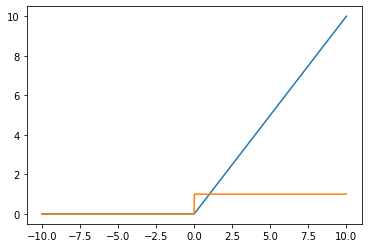

In [38]:
import matplotlib.pyplot as plt
x=np.linspace(-10,10,1000)
y1= ActivationFunctions.ReLu(x)
y2 = ActivationFunctions.ReLu(y1,derivative=True)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

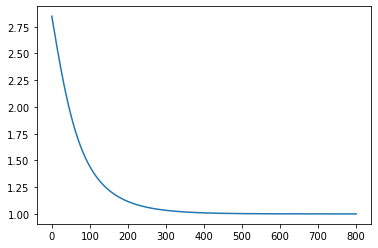

In [39]:
plt.plot(performance)
plt.show()

In [41]:
model.evaluate()

array([0.99995269])

In [43]:
for y,x in zip(train_dataset['endo'],train_dataset['egzo']):
    print(model.forward(x),y)
    
    

[0.49680155] [0.75]
[0.49587065] [0.25]
[0.497375] [0.25]
[0.49604188] [0.75]
[0.4972204] [0.25]
[0.49721244] [0.75]
[0.49778453] [0.75]
[0.49774981] [0.25]
[0.49921718] [0.25]
[0.49727964] [0.75]
[0.49913612] [0.75]
[0.49650289] [0.25]
[0.49947496] [0.75]
[0.4993943] [0.25]
[0.49948657] [0.25]
[0.49937549] [0.75]



Taka jest docelowa funckja LOSS czyli taka którą minimalizujemy.

```1```- indidator function https://www.wikiwand.com/en/Indicator_function

```i``` iteruje sie po obserwacjach

```c``` iteruje sie po klasach

$p_{model} [y_i \in C_c ]$ prawdopodobieństwo, że obserwacja i należy do klasy c

$-1/N*\Sigma_{i=1} ^N \Sigma_{c=1} ^C 1_{y_{i} \in C_{c}} log(p_{model}[y_i \in C_{c}]) $

In [54]:
"""
network.py
~~~~~~~~~~
A module to implement the stochastic gradient descent learning
algorithm for a feedforward neural network.  Gradients are calculated
using backpropagation.  Note that I have focused on making the code
simple, easily readable, and easily modifiable.  It is not optimized,
and omits many desirable features.
"""

#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print(f"Epoch {j}: {self.evaluate(test_data)} / { n_test}")
            else:
                print(f"Epoch {j} complete")

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)########
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass

        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose()) #!!!
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))
nn=Network([4,3,2])
x=[[1,1,0,0],[1,0,0,0],[0,1,0,0],[0,0,0,0],[1,1,1,0],[1,0,1,0],[0,1,1,0],[0,0,1,0],[1,1,0,1],[1,0,0,1],[0,1,0,1],[0,0,0,1],[1,1,1,1],[1,0,1,1],[0,1,1,1],[0,0,1,1]]
y=[[1,0],      [0,1],      [0,1],      [1,0],      [0,1],      [1,0],      [1,0],      [0,1],      [0,1],      [1,0],      [1,0],      [0,0],      [1,0],      [0,1],      [0,1],      [1,0]]
nn.SGD(list(zip(x,y)),1,2,0.1)


ValueError: operands could not be broadcast together with shapes (2,3) (2,) 